

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*


------

# Objective 

We are going to run a few experiments today

- Train a model with and without normalized data and investigate the weight values and learning outcomes
- Train a model with varying values for batch_size, learning_rate, and optimizers

We are essentially running mannual gridsearches on our models. In module 3, we'll learn a few different ways to automate gridseach for deep learning. 

In [101]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, RMSprop, Nadam
from keras.activations import relu
from tensorflow.keras.callbacks import TensorBoard

In [2]:
%matplotlib inline
%load_ext tensorboard

### Load data

- Don't normalize your data just yet!

In [3]:
def load_quickdraw10():
    """
    Loads quickdraw dataset that has been sampled to only 10 classes and 
    10000 observations per class.
    """
    
    URL_ = "https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true"
    
    path_to_zip = tf.keras.utils.get_file('./quickdraw10.npz', origin=URL_, extract=False)

    data = np.load(path_to_zip)

    X = data['arr_0']
    Y = data['arr_1']
        
    return train_test_split(X, Y, shuffle=True)

In [4]:
X_train, X_test, y_train, y_test = load_quickdraw10()

In [5]:
n_labels = len(np.unique(y_train))
print(n_labels)

10


In [6]:
X_train.shape, X_test.shape

((75000, 784), (25000, 784))

----
### Write a Model Function
- Write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. 

Your function `create_model` should accept the following parameters

- Learning Rate `lr`
- Optimizer `opt`


Build a model with the following architecture and parameter values

- Use `1 hidden layer` 
- Use `sigmoid` activation function in hidden layer
- Use `250 nodes` in hidden layer 
- Use `10 nodes` in output layer
- Use `softmax` activation fucntion in output layer
- Use `sparse_categorical_crossentropy` loss function
- Use `accuracy` as your metric 

We will use this function to build all the models that we'll need to run our experiments. 

In [102]:
def create_model(lr=.01, opt="adam"):
    """
    
    Build and returns a complies Keras model.  
    
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    opt: string
        Name of optimizer to use
        Valid options are "adam" and "sgd"
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """
    if opt == "adam":
        opt = Adam(learning_rate=lr)
        
    elif opt == "sgd":
        opt = SGD(learning_rate=lr)
        
    elif opt == "adadelta":
        opt = Adadelta(learning_rate=lr)
        
    elif opt == "RMSprop":
        opt =  RMSprop(learning_rate=lr)
    
    elif opt =="adagrad":
        opt = Adagrad(learning_rate=lr)
        
    elif opt == "nadam":
        opt = Nadam(learning_rate=lr)
        
    else:
        print ("{} is not a valid option. Defaulting to Adam optimizer".format(opt))
        opt = Adam(learning_rate=lr)

    # Build Sequential Model with
    # Hidden layer w/ 250 nodes and sigmoid activation function 
    # Outer layer w/ 10 classes and softmax activation
    
    model = Sequential()

    model.add(Dense(250, input_dim=784, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))

    # add a compile layer but don't fit your model yet 
    model.compile(optimizer=opt, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
# YOUR CODE HERE
    return model

In [8]:
# a check on model architecture
model = create_model()
n_layers = len(model.get_config()["layers"])
output_act_funct =  model.get_config()["layers"][-1]["config"]["activation"]

assert n_layers == 3, "You should have an input, one hidden, and an output layer"
assert output_act_funct == "softmax", "Output act funct should be softmax"

2021-07-23 20:20:08.332338: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


------

# Experiment #1: How does normalized input data affect our model's learning outcome?

In this experiment we are going to answer the above question by training identifical models on a normalized data set and on a non-normalized data set. 

Then we will 

- Analyze the trained weight values of our model 
- Plot

In [9]:
# Clear any logs from previous runs
!rm -rf ./logs/

### Fit Model on Non-Normalized data

In [10]:
# fit model on non-normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"No_Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

model = create_model(lr=.001, opt="adam")

history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          callbacks=[tensorboard])

2021-07-23 20:20:08.521045: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 20:20:08.521073: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 20:20:08.521568: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 20:20:08.602516: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
 126/2344 [>.............................] - ETA: 3s - loss: 1.5077 - accuracy: 0.5079

2021-07-23 20:20:09.209528: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 20:20:09.209550: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 20:20:09.213540: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 20:20:09.215456: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 20:20:09.218248: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/No_Normalization-20210723-202008/train/plugins/profile/2021_07_23_20_20_09
2021-07-23 20:20:09.219233: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/No_Normalization-20210723-202008/train/plugins/profile/2021_07_23_20_20_09/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 20:20:09.222020: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: 

2344/2344 [==============================] - 5s 2ms/step - loss: 0.9534 - accuracy: 0.7054 - val_loss: 0.8506 - val_accuracy: 0.7430
Epoch 2/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.8120 - accuracy: 0.7497 - val_loss: 0.7997 - val_accuracy: 0.7549
Epoch 3/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7735 - accuracy: 0.7593 - val_loss: 0.7624 - val_accuracy: 0.7635
Epoch 4/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7537 - accuracy: 0.7651 - val_loss: 0.7549 - val_accuracy: 0.7636
Epoch 5/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7375 - accuracy: 0.7715 - val_loss: 0.7721 - val_accuracy: 0.7556
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7275 - accuracy: 0.7727 - val_loss: 0.7334 - val_accuracy: 0.7731
Epoch 7/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.7116 - accuracy: 0.7774 - val_loss: 0.7462 - val_accuracy: 0.7664
Epo

In [11]:
df = pd.DataFrame(history.history)

<AxesSubplot:>

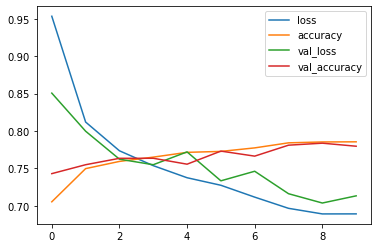

In [12]:
# YOUR CODE HERE
df.plot()

---------

### Fit Model on Normalized data

In [13]:
# Normalize your training and test sets 
# save normalized data to X_train_scaled and X_test_scaled
max_pixels = X_train.max(axis=1).max()
X_train_scaled =  X_train.astype('float32') / max_pixels
X_test_scaled = X_test.astype('float32') / max_pixels
# YOUR CODE HERE


In [14]:
X_train_scaled[0:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
# train model on normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

norm_model = create_model(lr=.001, opt="adam")

norm = norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          callbacks=[tensorboard])

2021-07-23 20:20:47.673383: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 20:20:47.673404: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 20:20:47.673700: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


Epoch 1/10
 108/2344 [>.............................] - ETA: 4s - loss: 1.4028 - accuracy: 0.5755  

2021-07-23 20:20:48.041556: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 20:20:48.041585: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 20:20:48.067009: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 20:20:48.067809: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 20:20:48.068960: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-202047/train/plugins/profile/2021_07_23_20_20_48
2021-07-23 20:20:48.069583: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-202047/train/plugins/profile/2021_07_23_20_20_48/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 20:20:48.070731: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

2344/2344 [==============================] - 4s 2ms/step - loss: 0.7758 - accuracy: 0.7688 - val_loss: 0.6277 - val_accuracy: 0.8172
Epoch 2/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.5535 - accuracy: 0.8363 - val_loss: 0.5344 - val_accuracy: 0.8416
Epoch 3/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4680 - accuracy: 0.8611 - val_loss: 0.4938 - val_accuracy: 0.8536
Epoch 4/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4140 - accuracy: 0.8775 - val_loss: 0.4708 - val_accuracy: 0.8576
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3721 - accuracy: 0.8899 - val_loss: 0.4608 - val_accuracy: 0.8658
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.9000 - val_loss: 0.4474 - val_accuracy: 0.8687
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3068 - accuracy: 0.9099 - val_loss: 0.4392 - val_accuracy: 0.8711
Epo

<AxesSubplot:>

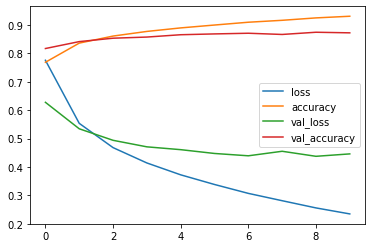

In [16]:
df = pd.DataFrame(norm.history)
df.plot()

### Each layer is labeled

Take note of the label for each layer in the network. It is these labels that will help you identify the corresponding bias and weight distribtuions on tensorboard. 

Assuming that you've ran `create_model` 3 times: once for the model check, once to create `model`, and once to create `norm_model`:

The name of the layers for `model` should be 
- dense_2
- dense_3

The name of the layers for `norm_model` should be 
- dense_4
- dense_5


If you keep retraining one or both of these models, tensorflow will increment the integer used in the layer names.  But that doesn't really matter, just take notice of the layer names so you can find their corresponding bias and weight distribtuions in tensorboard.

**Protip:** If you want to reset the integer incrementation that tensorflow uses, you'll need to restart your notebook's kernal. 

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


In [18]:
norm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


### Tensorboard 

- Run the cell below to launch tensorboard 
- Click on the `SCALARS` tab to see plots that compare the loss and accuracy between the two models
- Cick on the `HISTOGRAMS` tab to see the distribution of the learned weights 

In [19]:
%tensorboard --logdir logs

### Tensorboard 

Check out the loss and accuracy plots on the `SCALARS` tab. 

What you should see is that the accuracy is much higher for the model that was given normalized data; conversely, the loss is much lower for the model that was given normalized data. 

Recall that what we are doing whenever training a model is adjusting the value of the bias and weights in each layer. For simplicity of analysis, we only trained two layers: a hidden layer and the output layer. 

Now click on the `HISTOGRAM` tab. 

You should see both of your model's layer names. 

### Hidden Layer Distributions

Collapse the charts that correspond to the output layer so only the distributions for the weights and bias in the hidden layer are showing. (i.e. Only expand `dense_2` and `dense_4`). 

Also don't be confused by the word `kernel`, that's just the word that Tensorflow uses instead of weights. So, to be clear, **the kernal distributions are the weight values.** 

The `bias` distributions are the bias values. 

You should see 10 distributions stacked next to each other, **one distribution per epoch.**

The distribuion in the far back corresponds to the weight values at epoch 1 (tensorflow starts the count at 0, like the index for a list). The distribution at the very front corresponds to the weight values at the 10th epoch (tensorflow indexing show 9 instead of 10).

Notice how the shape of the distribution changes accross epochs? That's because their **values are being updated via Gradient Descent.** 

The distributions that you see are direclty responsible for the validation accuracy of our models. The reason why they look different between the two models is because one model was given normalize data and one wasn't. So you can conclude that the weight distributions in `dense_4` produce a higher validation accuracy than the weight distributions in `dense_2`. 

Now it's time to analyze those weight values more closely. 

----------
### Analyze Weights in Each Layer

In [20]:
# get the final bias and weight matrices for model
layer = model.get_layer(name="dense_2")
bias, weights = layer.get_weights()

In [21]:
# get the final  value bias and weight magrices for norm_moel
layer = norm_model.get_layer(name="dense_4")
bias_norm, weights_norm = layer.get_weights()

In [22]:
# this line of code should not throw an error if the number of weights is the same for the hidden layer of both models
# this line of code is known as a Unit Test 
assert weights.shape[0] == weights_norm.shape[0]

### Initial Weight Values

By default, Keras dense layers randomly initialize the weight values using [**GlorotUniform**](https://keras.io/api/layers/initializers/). 

The cell below is sampling values from the GlorotUniform distribution. Let's sample from the GlorotUniform distribution and plot it in order to get a sense of the initial distribution of our weights - before Gradient Descent starts upading their values at training time. 

In [23]:
# let's take 250 random samples form the GlorotUniform
# because they are random samples their exact values might have been a little different for model and norm_model - but we will assume that they were not statistically different 
# 250 because that's how many weights are in the hidden layer for both of our models
initializer = tf.keras.initializers.GlorotUniform(seed=1234)
initial_weight_values = initializer(shape=(1, 250))

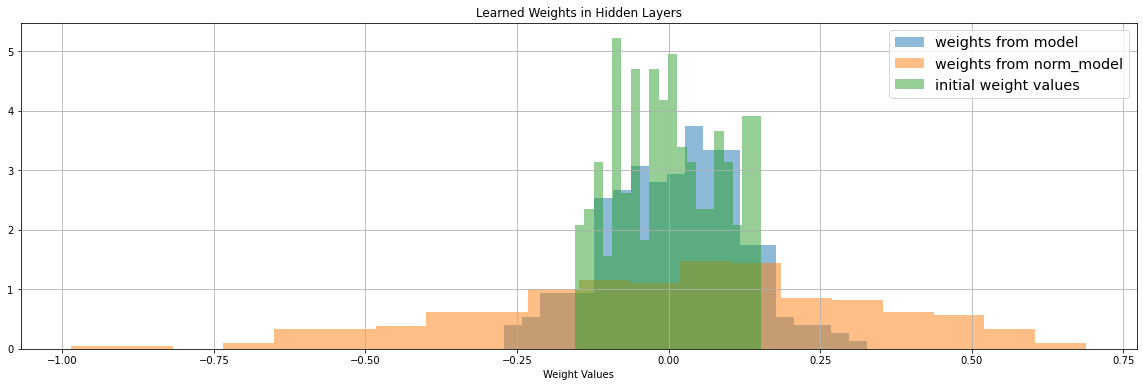

In [24]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

# by setting density=True, we are transforming our plots into probability distributions 
plt.hist(weights, bins=20, alpha=0.5, label="weights from model", density=True);
plt.hist(weights_norm, bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(initial_weight_values, bins=20, alpha=0.5, label="initial weight values", density=True);
plt.legend(fontsize="x-large");

### Observations

Your plot should have 3 distributions

- weights from model trained on non-normalized data
- weights from model trained on normalized data
- initial weight values sampled from a Glorot Uniform distributions 

Use the plot to answer the following questions.

**Comparing the initial weights with weights_from_model, what was the effect of not using normalized data?**

In comparing the initial weights to the weights from our non-normalized model we see that the tails of the distribution get wider and less concentrated. The initial weights are more concentrated around zero with the largest peaks in histogram count relative to any other model. In the non-normalized model weights, we can see the concentrated peaks in weight counts around zero are reduced and the tails get slightly wider.

**Comparing the initial weights with weights_from_norm_model, what was the effect of using normalized data?**

In comparing the initial weights to the weights from our non-normalized model, we see the same trend from initial to non-normalized weights but extended further. The distribution is much wider with less concentration of weight counts around 0.

**Using your understand of how Gradient Descent works, why do you think that the distributions between weights_from_model and weights_from_norm_model look so different?**

In comparing the weights of our models with normalized data and non-normzalized data, the distribution of the weights in the non-normalized model is much more concentrated/skinner. Thus the average weight in the non-normalized model relative to the normalized is of smaller magnitude. Since the data is not normalized, the greyscale neuron value the weight is being applied to is a larger number.

----

# Additional Experiments

The previous experiment demonstrated the importance of normalizing our data in order to maximize model accuracy. In the next few experiments, we are going to explore the effect that certain values for Batch Size, Learning Rate, and different Optimizers have on model accuracy. 

Using our **create_model** model building function, conduct the following experiments. 

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [72]:
import seaborn as sns
%matplotlib inline
    

In [133]:
def batch_experiment(batch_size):    
    
    title = "Batch Experimentation, Batch Size = " + str(batch_size)
    model = create_model(lr=.001, opt="adam")
    norm_batch = model.fit(X_train_scaled, y_train, 
              validation_data=(X_test_scaled, y_test),
              workers=-1, 
              epochs=10, 
              batch_size=batch_size, 
              verbose=1, 
              callbacks=[tensorboard])
    df = pd.DataFrame(norm_batch.history)
    epochs = [i for i in range( len(df.loss) )]
    ax = sns.lineplot(epochs, df.accuracy, label="train")
    ax = sns.lineplot(epochs, df.val_accuracy, label="test")
    ax.set_title(title)
    
    max_val = str( round( max(df.val_accuracy), 2 ) )
    msg = "Max Validation Accuracy: " + max_val + " Using Batch Size: " + str(batch_size)
    
    print(msg)
    plt.show()
    

In [132]:
def lr_experiment(lr):    
    title = "Learning Rate Experimentation, lr = " + str(lr)
    model = create_model(lr=lr, opt="adam")
    
    model_fit = model.fit(X_train_scaled, y_train, 
              validation_data=(X_test_scaled, y_test),
              workers=-1, 
              epochs=10, 
              batch_size=80, 
              verbose=1, 
              callbacks=[tensorboard])
    df = pd.DataFrame(model_fit.history)
    epochs = [i for i in range( len(df.loss) )]
    ax = sns.lineplot(epochs, df.accuracy, label="train")
    ax = sns.lineplot(epochs, df.val_accuracy, label="test")
    ax.set_title(title)
    
    max_val = str( round( max(df.val_accuracy), 2 ) )
    msg = "Max Validation Accuracy: " + max_val + " Using lr: " + str(lr)
    
    print(msg)
    plt.show()

In [131]:
def opt_experiment(opt):    
    title = "Optimizer Experimentation, Optimizer = " + opt
    model = create_model(lr=.001, opt=opt)
    
    model_fit = model.fit(X_train_scaled, y_train, 
              validation_data=(X_test_scaled, y_test),
              workers=-1, 
              epochs=10, 
              batch_size=80, 
              verbose=1, 
              callbacks=[tensorboard])
    df = pd.DataFrame(model_fit.history)
    epochs = [i for i in range( len(df.loss) )]
    ax = sns.lineplot(epochs, df.accuracy, label="train")
    ax = sns.lineplot(epochs, df.val_accuracy, label="test")
    ax.set_title(title)
    max_val = str( round( max(df.val_accuracy), 2 ) )
    msg = "Max Validation Accuracy: " + max_val + " Using Optimizer: " + opt
    print(msg)
    plt.show()

Epoch 1/10
 141/4688 [..............................] - ETA: 6s - loss: 1.0682 - accuracy: 0.6538

2021-07-23 21:54:49.067769: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 21:54:49.067787: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 21:54:49.090327: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 21:54:49.091216: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 21:54:49.092072: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_54_49
2021-07-23 21:54:49.092795: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_54_49/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 21:54:49.093922: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

4688/4688 [==============================] - 7s 1ms/step - loss: 0.6921 - accuracy: 0.7881 - val_loss: 0.6508 - val_accuracy: 0.8041
Epoch 2/10
4688/4688 [==============================] - 7s 1ms/step - loss: 0.5985 - accuracy: 0.8211 - val_loss: 0.6224 - val_accuracy: 0.8150
Epoch 3/10
4688/4688 [==============================] - 8s 2ms/step - loss: 0.5650 - accuracy: 0.8302 - val_loss: 0.6390 - val_accuracy: 0.8104
Epoch 4/10
4688/4688 [==============================] - 7s 1ms/step - loss: 0.5420 - accuracy: 0.8380 - val_loss: 0.6229 - val_accuracy: 0.8180
Epoch 5/10
4688/4688 [==============================] - 7s 1ms/step - loss: 0.5219 - accuracy: 0.8433 - val_loss: 0.5974 - val_accuracy: 0.8244
Epoch 6/10
4688/4688 [==============================] - 6s 1ms/step - loss: 0.5003 - accuracy: 0.8496 - val_loss: 0.5874 - val_accuracy: 0.8286
Epoch 7/10
4688/4688 [==============================] - 7s 2ms/step - loss: 0.4916 - accuracy: 0.8515 - val_loss: 0.6125 - val_accuracy: 0.8267
Epo

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


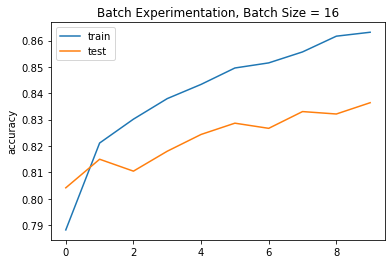

Epoch 1/10
 123/2344 [>.............................] - ETA: 3s - loss: 1.0944 - accuracy: 0.6491

2021-07-23 21:55:57.942067: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 21:55:57.942086: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 21:55:57.962916: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 21:55:57.963903: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 21:55:57.964748: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_55_57
2021-07-23 21:55:57.965415: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_55_57/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 21:55:57.966694: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

2344/2344 [==============================] - 5s 2ms/step - loss: 0.6511 - accuracy: 0.8005 - val_loss: 0.5877 - val_accuracy: 0.8242
Epoch 2/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.5300 - accuracy: 0.8395 - val_loss: 0.5562 - val_accuracy: 0.8318
Epoch 3/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4987 - accuracy: 0.8493 - val_loss: 0.5562 - val_accuracy: 0.8380
Epoch 4/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4731 - accuracy: 0.8562 - val_loss: 0.5672 - val_accuracy: 0.8346
Epoch 5/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4499 - accuracy: 0.8631 - val_loss: 0.5794 - val_accuracy: 0.8332
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4312 - accuracy: 0.8696 - val_loss: 0.5708 - val_accuracy: 0.8387
Epoch 7/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4150 - accuracy: 0.8722 - val_loss: 0.5857 - val_accuracy: 0.8351
Epo

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


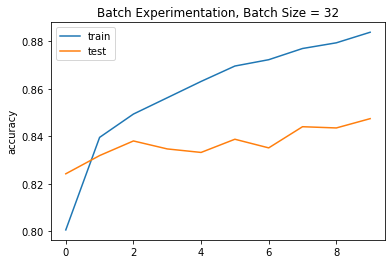

Epoch 1/10
 115/1563 [=>............................] - ETA: 2s - loss: 0.9918 - accuracy: 0.6866

2021-07-23 21:56:40.471728: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 21:56:40.471747: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 21:56:40.494099: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 21:56:40.494997: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 21:56:40.495920: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_56_40
2021-07-23 21:56:40.496583: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_56_40/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 21:56:40.497692: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

1563/1563 [==============================] - 3s 2ms/step - loss: 0.6402 - accuracy: 0.8040 - val_loss: 0.5939 - val_accuracy: 0.8226
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5091 - accuracy: 0.8465 - val_loss: 0.5505 - val_accuracy: 0.8355
Epoch 3/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.4689 - accuracy: 0.8585 - val_loss: 0.5483 - val_accuracy: 0.8411
Epoch 4/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.4359 - accuracy: 0.8677 - val_loss: 0.5415 - val_accuracy: 0.8423
Epoch 5/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.4085 - accuracy: 0.8741 - val_loss: 0.5439 - val_accuracy: 0.8460
Epoch 6/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.3859 - accuracy: 0.8812 - val_loss: 0.5340 - val_accuracy: 0.8483
Epoch 7/10
1563/1563 [==============================] - 2s 2ms/step - loss: 0.3712 - accuracy: 0.8848 - val_loss: 0.5447 - val_accuracy: 0.8496
Epo

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


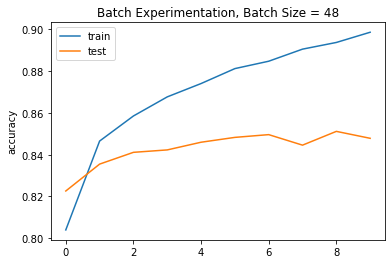

Epoch 1/10
 119/1172 [==>...........................] - ETA: 1s - loss: 0.9795 - accuracy: 0.6952

2021-07-23 21:57:06.261518: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 21:57:06.261536: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 21:57:06.284078: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 21:57:06.285324: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 21:57:06.286240: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_57_06
2021-07-23 21:57:06.286886: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_57_06/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 21:57:06.288068: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

1172/1172 [==============================] - 3s 2ms/step - loss: 0.6420 - accuracy: 0.8050 - val_loss: 0.5664 - val_accuracy: 0.8266
Epoch 2/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.4948 - accuracy: 0.8502 - val_loss: 0.5203 - val_accuracy: 0.8450
Epoch 3/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.4487 - accuracy: 0.8637 - val_loss: 0.5289 - val_accuracy: 0.8453
Epoch 4/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.4138 - accuracy: 0.8733 - val_loss: 0.5069 - val_accuracy: 0.8530
Epoch 5/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.3865 - accuracy: 0.8811 - val_loss: 0.5176 - val_accuracy: 0.8508
Epoch 6/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.3642 - accuracy: 0.8869 - val_loss: 0.5222 - val_accuracy: 0.8494
Epoch 7/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.3425 - accuracy: 0.8934 - val_loss: 0.5291 - val_accuracy: 0.8530
Epo

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


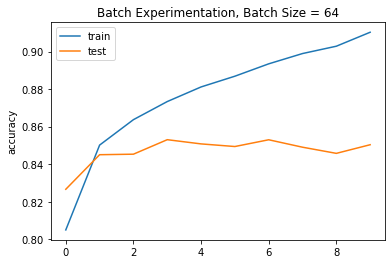

Epoch 1/10
112/938 [==>...........................] - ETA: 1s - loss: 0.9842 - accuracy: 0.6840

2021-07-23 21:57:28.002648: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 21:57:28.002670: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 21:57:28.025990: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 21:57:28.026959: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 21:57:28.027881: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_57_28
2021-07-23 21:57:28.028704: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_21_57_28/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 21:57:28.029918: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 0.6485 - accuracy: 0.8002 - val_loss: 0.5723 - val_accuracy: 0.8206
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4865 - accuracy: 0.8528 - val_loss: 0.5155 - val_accuracy: 0.8448
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4357 - accuracy: 0.8671 - val_loss: 0.5243 - val_accuracy: 0.8443
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3981 - accuracy: 0.8794 - val_loss: 0.5113 - val_accuracy: 0.8494
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3663 - accuracy: 0.8869 - val_loss: 0.5299 - val_accuracy: 0.8505
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3405 - accuracy: 0.8948 - val_loss: 0.5268 - val_accuracy: 0.8524
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3214 - accuracy: 0.8996 - val_loss: 0.5494 - val_accuracy: 0.8542
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


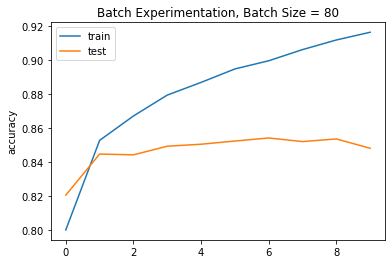

In [122]:
batch_sizes = range(16, 81, 16)

for batch_size in batch_sizes:
    batch_experiment(batch_size)

## Batch Size
 Our validation accuracy actually increases marginally using a batch size of 32 vs. 16. Batch Sizes from 32 - 80 result in the same validation accuracy. Thus the 'best' option would be to use a batch size of 80 since our models will run faster

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

Epoch 1/10
109/938 [==>...........................] - ETA: 1s - loss: 26.1442 - accuracy: 0.3253

2021-07-23 22:05:46.933366: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:05:46.933386: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:05:46.956431: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:05:46.957253: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:05:46.958202: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_05_46
2021-07-23 22:05:46.958862: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_05_46/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:05:46.959985: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 10.4871 - accuracy: 0.3976 - val_loss: 10.2993 - val_accuracy: 0.4128
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 7.5896 - accuracy: 0.4537 - val_loss: 8.0394 - val_accuracy: 0.4490
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 7.4858 - accuracy: 0.4698 - val_loss: 12.7249 - val_accuracy: 0.3710
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 8.1106 - accuracy: 0.4668 - val_loss: 7.9343 - val_accuracy: 0.5211
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 7.2356 - accuracy: 0.4914 - val_loss: 4.5196 - val_accuracy: 0.5894
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 6.8154 - accuracy: 0.5048 - val_loss: 4.6999 - val_accuracy: 0.5725
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 7.2105 - accuracy: 0.5115 - val_loss: 5.2065 - val_accuracy: 0.5495
Epoch 8/10
938

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


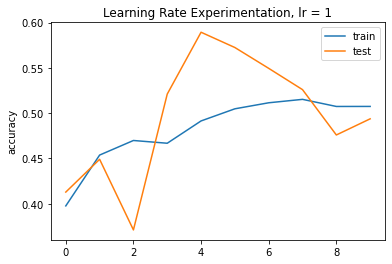

Epoch 1/10
100/938 [==>...........................] - ETA: 1s - loss: 1.7971 - accuracy: 0.5474

2021-07-23 22:06:05.904551: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:06:05.904571: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:06:05.926656: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:06:05.927480: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:06:05.928456: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_06_05
2021-07-23 22:06:05.929210: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_06_05/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:06:05.930669: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 1.1109 - accuracy: 0.6720 - val_loss: 1.0702 - val_accuracy: 0.6991
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9499 - accuracy: 0.7180 - val_loss: 0.9341 - val_accuracy: 0.7199
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9014 - accuracy: 0.7327 - val_loss: 0.8820 - val_accuracy: 0.7370
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8893 - accuracy: 0.7359 - val_loss: 0.8985 - val_accuracy: 0.7354
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8917 - accuracy: 0.7364 - val_loss: 0.9891 - val_accuracy: 0.7024
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8657 - accuracy: 0.7451 - val_loss: 0.9700 - val_accuracy: 0.7096
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8519 - accuracy: 0.7503 - val_loss: 0.8306 - val_accuracy: 0.7630
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


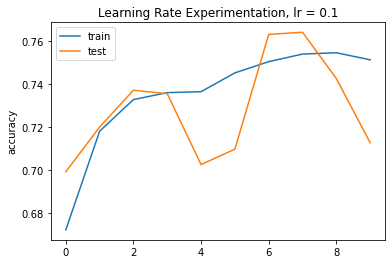

Epoch 1/10
108/938 [==>...........................] - ETA: 1s - loss: 0.9579 - accuracy: 0.7049

2021-07-23 22:06:24.308998: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:06:24.309019: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:06:24.331231: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:06:24.332088: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:06:24.332984: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_06_24
2021-07-23 22:06:24.333611: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_06_24/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:06:24.334685: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 0.6390 - accuracy: 0.8054 - val_loss: 0.5534 - val_accuracy: 0.8319
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4882 - accuracy: 0.8520 - val_loss: 0.5384 - val_accuracy: 0.8365
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4358 - accuracy: 0.8676 - val_loss: 0.5064 - val_accuracy: 0.8484
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4014 - accuracy: 0.8759 - val_loss: 0.5069 - val_accuracy: 0.8544
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3701 - accuracy: 0.8862 - val_loss: 0.5499 - val_accuracy: 0.8442
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3420 - accuracy: 0.8941 - val_loss: 0.5333 - val_accuracy: 0.8536
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3194 - accuracy: 0.9014 - val_loss: 0.5558 - val_accuracy: 0.8475
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


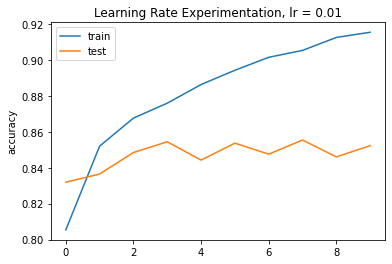

Epoch 1/10
106/938 [==>...........................] - ETA: 1s - loss: 1.3009 - accuracy: 0.6092

2021-07-23 22:06:44.067568: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:06:44.067587: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:06:44.094028: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:06:44.094872: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:06:44.095702: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_06_44
2021-07-23 22:06:44.096354: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_06_44/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:06:44.097514: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 0.8433 - accuracy: 0.7517 - val_loss: 0.7039 - val_accuracy: 0.7972
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6232 - accuracy: 0.8173 - val_loss: 0.5966 - val_accuracy: 0.8241
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5341 - accuracy: 0.8427 - val_loss: 0.5421 - val_accuracy: 0.8412
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4741 - accuracy: 0.8609 - val_loss: 0.5133 - val_accuracy: 0.8479
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4313 - accuracy: 0.8733 - val_loss: 0.4747 - val_accuracy: 0.8613
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3969 - accuracy: 0.8841 - val_loss: 0.4618 - val_accuracy: 0.8650
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3666 - accuracy: 0.8929 - val_loss: 0.4503 - val_accuracy: 0.8692
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


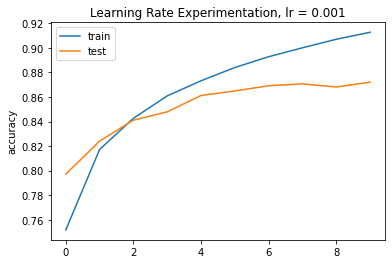

Epoch 1/10
115/938 [==>...........................] - ETA: 1s - loss: 2.0844 - accuracy: 0.3580

2021-07-23 22:07:03.045216: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:07:03.045237: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:07:03.068175: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:07:03.069025: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:07:03.069924: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_07_03
2021-07-23 22:07:03.070519: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_07_03/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:07:03.071736: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 1.3314 - accuracy: 0.6369 - val_loss: 1.0093 - val_accuracy: 0.7192
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9236 - accuracy: 0.7381 - val_loss: 0.8866 - val_accuracy: 0.7435
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8427 - accuracy: 0.7567 - val_loss: 0.8356 - val_accuracy: 0.7603
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7993 - accuracy: 0.7678 - val_loss: 0.8014 - val_accuracy: 0.7690
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7670 - accuracy: 0.7768 - val_loss: 0.7740 - val_accuracy: 0.7771
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7393 - accuracy: 0.7859 - val_loss: 0.7495 - val_accuracy: 0.7840
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.7146 - accuracy: 0.7927 - val_loss: 0.7288 - val_accuracy: 0.7904
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


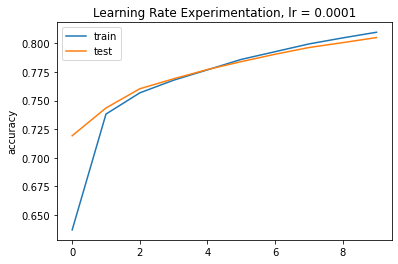

In [129]:
lrs = [1, .1, .01, .001, .0001]

for lr in lrs:
    lr_experiment(lr)

## Learning Rate Experimentation
Our max validation accuracy increases with every order of magnitude decrease in learning rate. Our best performing learning rate appears to be our smallest value which requires more epochs to reach convergence.

Since a lr of .001 results in the max performance over 10 epochs, let's select that, knowing that a smaller lr and greater # of epochs would likely provide marginally better results.

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

Epoch 1/10
104/938 [==>...........................] - ETA: 1s - loss: 2.4697 - accuracy: 0.1356

2021-07-23 22:08:22.522669: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:08:22.522691: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:08:22.545204: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:08:22.546074: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:08:22.546995: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_08_22
2021-07-23 22:08:22.547610: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_08_22/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:08:22.548738: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 2.1296 - accuracy: 0.3810 - val_loss: 1.8844 - val_accuracy: 0.5367
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.7267 - accuracy: 0.5958 - val_loss: 1.5986 - val_accuracy: 0.6294
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 1.4983 - accuracy: 0.6505 - val_loss: 1.4209 - val_accuracy: 0.6602
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 1.3529 - accuracy: 0.6719 - val_loss: 1.3048 - val_accuracy: 0.6728
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 1.2551 - accuracy: 0.6833 - val_loss: 1.2238 - val_accuracy: 0.6844
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1849 - accuracy: 0.6929 - val_loss: 1.1644 - val_accuracy: 0.6924
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1322 - accuracy: 0.7009 - val_loss: 1.1188 - val_accuracy: 0.6986
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


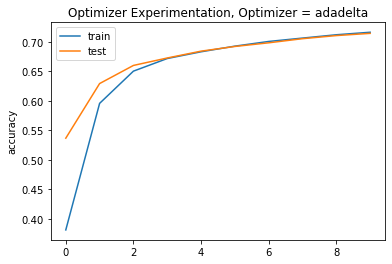

Epoch 1/10
 81/938 [=>............................] - ETA: 2s - loss: 2.2041 - accuracy: 0.2668

2021-07-23 22:08:43.808918: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:08:43.808941: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:08:43.833909: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:08:43.834699: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:08:43.835531: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_08_43
2021-07-23 22:08:43.836188: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_08_43/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:08:43.837302: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 3s 3ms/step - loss: 1.4607 - accuracy: 0.6154 - val_loss: 1.1066 - val_accuracy: 0.6852
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.0070 - accuracy: 0.7168 - val_loss: 0.9566 - val_accuracy: 0.7259
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9147 - accuracy: 0.7368 - val_loss: 0.9012 - val_accuracy: 0.7385
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8734 - accuracy: 0.7471 - val_loss: 0.8731 - val_accuracy: 0.7464
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8488 - accuracy: 0.7538 - val_loss: 0.8536 - val_accuracy: 0.7526
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8314 - accuracy: 0.7584 - val_loss: 0.8401 - val_accuracy: 0.7558
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.8180 - accuracy: 0.7626 - val_loss: 0.8291 - val_accuracy: 0.7618
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


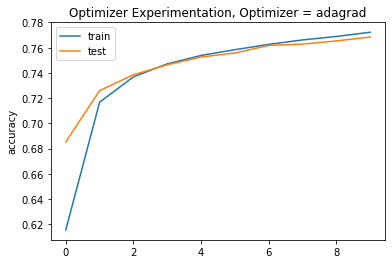

Epoch 1/10
103/938 [==>...........................] - ETA: 1s - loss: 0.9924 - accuracy: 0.6958

2021-07-23 22:09:04.089667: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:09:04.089688: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:09:04.112926: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:09:04.113715: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:09:04.114547: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_09_04
2021-07-23 22:09:04.115113: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_09_04/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:09:04.116103: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 0.6455 - accuracy: 0.8048 - val_loss: 0.5494 - val_accuracy: 0.8352
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4833 - accuracy: 0.8538 - val_loss: 0.5166 - val_accuracy: 0.8445
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4307 - accuracy: 0.8691 - val_loss: 0.5129 - val_accuracy: 0.8516
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3957 - accuracy: 0.8793 - val_loss: 0.5158 - val_accuracy: 0.8538
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3643 - accuracy: 0.8875 - val_loss: 0.5196 - val_accuracy: 0.8525
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3389 - accuracy: 0.8946 - val_loss: 0.5214 - val_accuracy: 0.8547
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3153 - accuracy: 0.9010 - val_loss: 0.5495 - val_accuracy: 0.8518
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


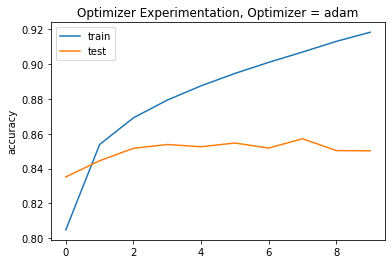

adamax is not a valid option. Defaulting to Adam optimizer
Epoch 1/10
106/938 [==>...........................] - ETA: 1s - loss: 0.9783 - accuracy: 0.6925

2021-07-23 22:09:23.935164: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:09:23.935187: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:09:23.958221: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:09:23.959079: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:09:23.960745: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_09_23
2021-07-23 22:09:23.961354: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_09_23/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:09:23.962491: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 0.6423 - accuracy: 0.8039 - val_loss: 0.5657 - val_accuracy: 0.8240
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4857 - accuracy: 0.8536 - val_loss: 0.5347 - val_accuracy: 0.8428
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4345 - accuracy: 0.8675 - val_loss: 0.5269 - val_accuracy: 0.8445
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3975 - accuracy: 0.8784 - val_loss: 0.5078 - val_accuracy: 0.8520
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3705 - accuracy: 0.8852 - val_loss: 0.5344 - val_accuracy: 0.8480
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3428 - accuracy: 0.8937 - val_loss: 0.5350 - val_accuracy: 0.8500
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3193 - accuracy: 0.8989 - val_loss: 0.5392 - val_accuracy: 0.8544
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


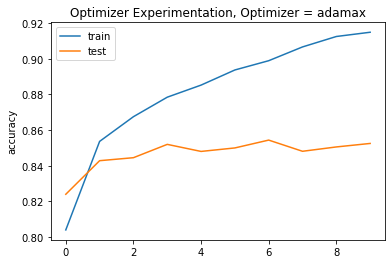

Epoch 1/10
 49/938 [>.............................] - ETA: 3s - loss: 1.1980 - accuracy: 0.6143

2021-07-23 22:09:43.001705: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:09:43.001724: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:09:43.039257: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:09:43.040881: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:09:43.042285: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_09_43
2021-07-23 22:09:43.043199: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_09_43/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:09:43.045737: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 3s 3ms/step - loss: 0.6438 - accuracy: 0.8029 - val_loss: 0.5345 - val_accuracy: 0.8397
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.8568 - val_loss: 0.5028 - val_accuracy: 0.8496
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.4231 - accuracy: 0.8721 - val_loss: 0.5286 - val_accuracy: 0.8443
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3880 - accuracy: 0.8815 - val_loss: 0.5016 - val_accuracy: 0.8523
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3553 - accuracy: 0.8914 - val_loss: 0.5210 - val_accuracy: 0.8484
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3335 - accuracy: 0.8960 - val_loss: 0.5278 - val_accuracy: 0.8507
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3048 - accuracy: 0.9055 - val_loss: 0.5344 - val_accuracy: 0.8507
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


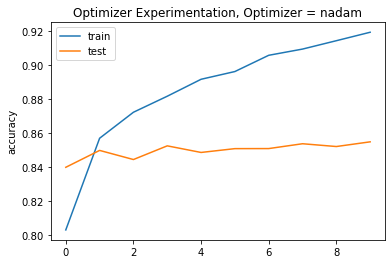

Epoch 1/10
 73/938 [=>............................] - ETA: 2s - loss: 1.2640 - accuracy: 0.6320

2021-07-23 22:10:07.830826: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:10:07.830845: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:10:07.863405: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:10:07.864623: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:10:07.866033: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_10_07
2021-07-23 22:10:07.866932: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_10_07/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:10:07.869551: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 3s 3ms/step - loss: 0.6496 - accuracy: 0.8045 - val_loss: 0.6093 - val_accuracy: 0.8168
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4755 - accuracy: 0.8596 - val_loss: 0.5421 - val_accuracy: 0.8420
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4224 - accuracy: 0.8765 - val_loss: 0.5886 - val_accuracy: 0.8372
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3833 - accuracy: 0.8877 - val_loss: 0.6148 - val_accuracy: 0.8358
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3511 - accuracy: 0.8971 - val_loss: 0.5850 - val_accuracy: 0.8522
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3191 - accuracy: 0.9061 - val_loss: 0.6308 - val_accuracy: 0.8478
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2940 - accuracy: 0.9132 - val_loss: 0.6162 - val_accuracy: 0.8544
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


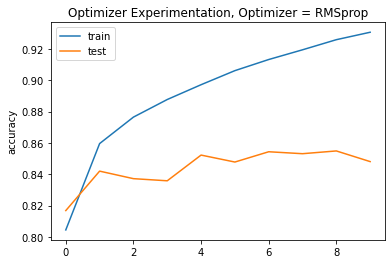

Epoch 1/10
127/938 [===>..........................] - ETA: 1s - loss: 2.2334 - accuracy: 0.2437

2021-07-23 22:10:29.753683: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-23 22:10:29.753702: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-23 22:10:29.773696: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-23 22:10:29.774522: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-23 22:10:29.775406: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_10_29
2021-07-23 22:10:29.776054: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/Normalization-20210723-203024/train/plugins/profile/2021_07_23_22_10_29/Chriss-MacBook-Pro.local.trace.json.gz
2021-07-23 22:10:29.777077: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/N

938/938 [==============================] - 2s 2ms/step - loss: 1.8406 - accuracy: 0.5287 - val_loss: 1.4937 - val_accuracy: 0.6275
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.3123 - accuracy: 0.6653 - val_loss: 1.1953 - val_accuracy: 0.6767
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1171 - accuracy: 0.6964 - val_loss: 1.0698 - val_accuracy: 0.7047
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 1.0230 - accuracy: 0.7141 - val_loss: 1.0012 - val_accuracy: 0.7187
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9675 - accuracy: 0.7256 - val_loss: 0.9574 - val_accuracy: 0.7246
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9312 - accuracy: 0.7345 - val_loss: 0.9290 - val_accuracy: 0.7327
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9062 - accuracy: 0.7399 - val_loss: 0.9095 - val_accuracy: 0.7364
Epoch 8/10
938/93

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


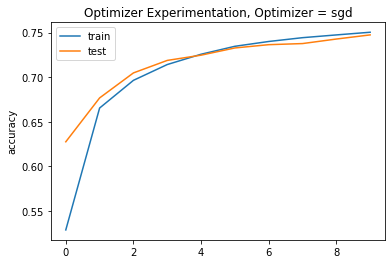

In [130]:
optimizers = ["adadelta", "adagrad", "adam", "adamax", "nadam", "RMSprop", "sgd" ]

for optimizer in optimizers:
    opt_experiment(optimizer)

## Optimizer Experimentation
Optimizers: 
 - RMSprop, nadam, adamax, and adam provide comparable performance
 - adadelta, adagrad reduce performance


------

## Stretch Goals: 

- On the learning rate experiments, implement [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Review the math of Gradient Descent. 